In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def accel(x,GM):
    return -x*GM/(np.linalg.norm(x)**3)


# Runge Kutta, 4th order
def RK4(x,v, GM,dt):
    v1 = v
    a1 = accel(x,GM)  
    v2 = v +0.5*a1*dt
    a2 = accel(x+0.5*dt*v1,GM) 
    v3 = v +0.5*a2*dt
    a3 = accel(x+0.5*dt*v2,GM)
    v4 = v + a3*dt
    a4 = accel(x+dt*v3,GM)
    xp = x+(v1+2*v2+2*v3+v4)/6.0 * dt
    vp = v+(a1+2*a2+2*a3+a4)/6.0 * dt
    return (xp,vp)
   

# Runge Kutta, 3rd order
def RK3(x,v, GM,dt):
    v1 = v
    a1 = accel(x,GM)  
    v2 = v +0.5*a1*dt
    a2 = accel(x+0.5*dt*v1,GM) 
    v3 = v - a1*dt +2*a2*dt
    a3 = accel(x-dt*v1+2*dt*v2,GM)
    xp = x+(v1+4*v2+v3)/6.0 * dt
    vp = v+(a1+4*a2+a3)/6.0 * dt
    return (xp,vp)    

# Runge Kutta, 2nd order
def RK2(x,v, GM,dt):
    v1 = v
    a1 = accel(x,GM)  
    v2 = v + a1*dt
    a2 = accel(x+dt*v1,GM) 
    xp = x+(v1+v2)/2.0 * dt
    vp = v+(a1+a2)/2.0 * dt
    return (xp,vp) 
    
   
GM = 3.986004418e14 # GM of the Earth

#Radius of the Earth
Re=6371e3

#orbit height
H=400e3

#circular orbit
a=Re+H




The orbital period T is only depending in the semir major axis a, not the eccentricity !!!

In [84]:
T=np.sqrt(4*np.pi**2*a**3/GM)
print(T)

5544.855095980793


Compute the orbital velocity

In [85]:
v0=np.sqrt(GM/a)
print(v0)

7672.598648385013


Put the satellite at a random position at distance a, with a random velocity component (perpendicular to x and of length v)

In [86]:
xr= np.random.randn(3)
x=a*xr/np.linalg.norm(xr)
print(x)

[-3776870.14281116 -2064108.52655047  5226963.64201659]


In [87]:
# the following code compute just a vector that is "randomly" perpendicular to x and has magnitude v0
ur1=np.random.randn(3)
xr1=xr/np.linalg.norm(xr)
ur2=ur1-np.dot(ur1,xr1)*xr1
v=v0*ur2/np.linalg.norm(ur2)
print(v)

[6072.46199411  650.0412094  4644.50447038]


Do one full orbit in N steps

In [88]:
N = 200
t = np.linspace(0.0, T, num=N)
dt=t[1]-t[0]

xc=x
vc=v

x_all=np.zeros((3, N))
v_all=np.zeros((3, N))
r_all=np.zeros(N)
v0_all=np.zeros(N)

x_all[:,0]=xc
v_all[:,0]=vc
r_all[0]=np.linalg.norm(xc)
v0_all[0]=np.linalg.norm(vc)

for i in range (0,len(t)-1):
    (xc,vc)=RK4(xc,vc,GM,dt)  #choose the RK method here !!!!
    x_all[:,i+1]=xc
    v_all[:,i+1]=vc
    r_all[i+1]=np.linalg.norm(xc)
    v0_all[i+1]=np.linalg.norm(vc)
    

Plot the orbit

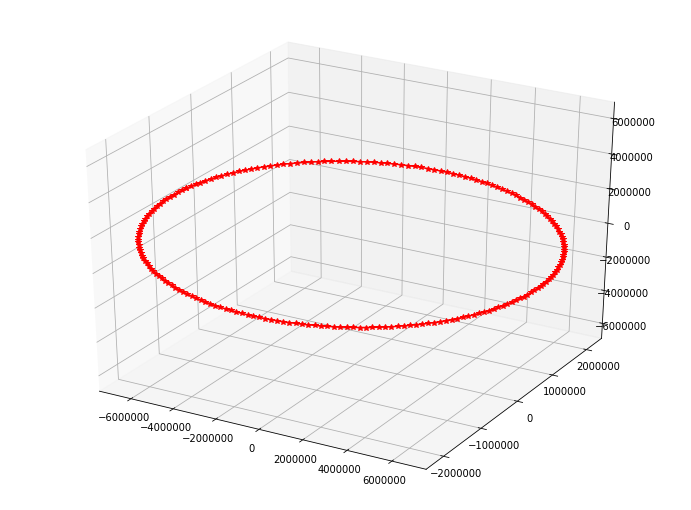

In [89]:
fig = plt.figure(1,figsize=(12, 9))
ax = fig.gca(projection='3d')
# Data for a three-dimensional line
ax.plot(x_all[0,:], x_all[1,:], x_all[2,:], 'r*-')
plt.show()


Compute the difference between the start and the end position after one orbit

In [90]:
print(x-xc)

[-0.9252783  -0.10814059 -0.66324079]


Plot the difference between the nominal radius and the one computed in each step

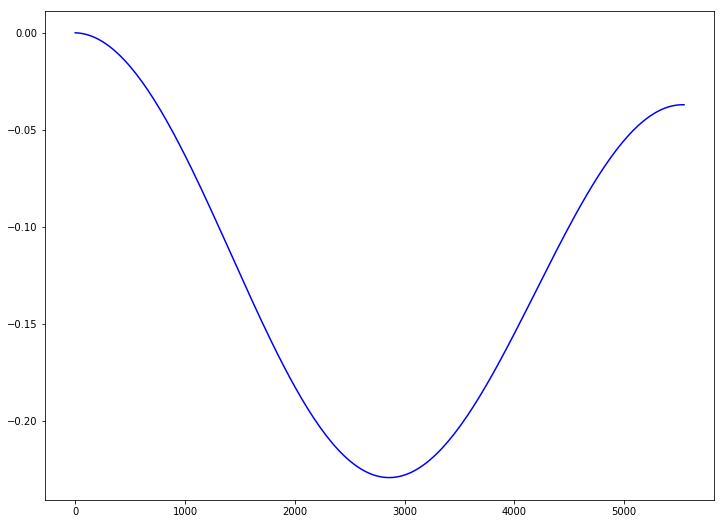

In [91]:
plt.figure(1,figsize=(12, 9))
plt.plot(t, r_all-a, 'b-')
plt.show()



Plot the difference between the nominal velocity and the one computed in each step

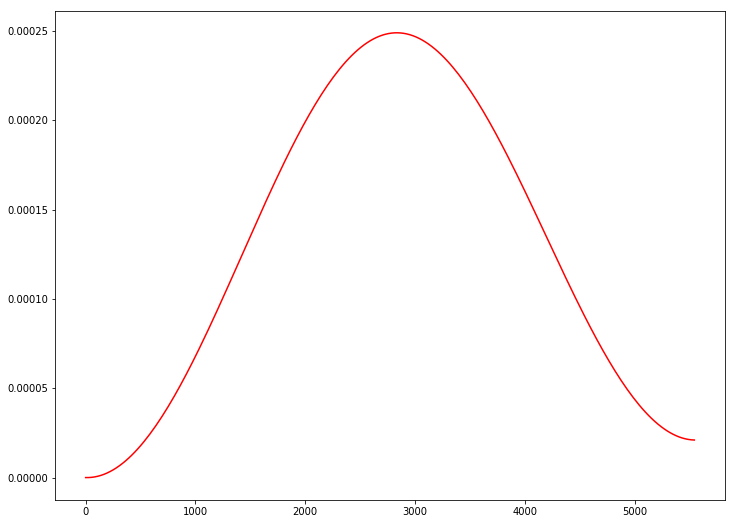

In [92]:
plt.figure(1,figsize=(12, 9))
plt.plot(t, v0_all-v0, 'r-')
plt.show()

